In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
#Generate batches of tensor image data with real-time data augmentation.
from tensorflow.keras.applications import MobileNetV2
#MobileNetV2 is a general architecture and can be used for multiple use cases. Depending on the use case, it can use different input layer size and different width factors. This allows different width models to reduce the number of multiply-adds and thereby reduce inference cost on mobile devices.
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
#Applies Dropout to the input.
from tensorflow.keras.layers import Flatten
#Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense
#Just your regular densely-connected NN layer.
from tensorflow.keras.layers import Input
#Input() is used to instantiate a Keras tensor.
from tensorflow.keras.models import Model
#Model groups layers into an object with training and inference features.
from tensorflow.keras.optimizers import Adam
#Optimizer that implements the Adam algorithm.
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
#Preprocesses a tensor or Numpy array encoding a batch of images.
from tensorflow.keras.preprocessing.image import img_to_array
#Converts a PIL Image instance to a Numpy array.
from tensorflow.keras.preprocessing.image import load_img
#Loads an image into PIL format.
from tensorflow.keras.utils import to_categorical
#Converts a class vector (integers) to binary class matrix.
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
#The OS module in python provides functions for interacting with the operating system

In [2]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
#the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.
EPOCHS = 20
#An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.
BS = 32
#Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration.

In [3]:
DIRECTORY = r"C:\Users\Anik Chowdhury\Desktop\Tensorflow Keras Project\Mask detection\dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [4]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    #os.path.join() method in Python join one or more path components intelligently. This method concatenates various path components with exactly one directory separator (‘/’) following each non-empty part except the last path component. If the last path component to be joined is empty then a directory seperator (‘/’) is put at the end.
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path,target_size=(224, 224))
        #tf.keras.preprocessing.image.load_img(path,grayscale,color_mode,target_size,interpolation)
        #path->	Path to image file.
        #grayscale->DEPRECATED use color_mode="grayscale"
        #color_mode->One of "grayscale", "rgb", "rgba". Default: "rgb". The desired image format.
        #target_size->Either None (default to original size) or tuple of ints (img_height, img_width).
        #interpolation->Interpolation method used to resample the image if the target size is different from that of the loaded image. Supported methods are "nearest", "bilinear", and "bicubic"
        image = img_to_array(image)
        #tf.keras.preprocessing.image.img_to_array(img,data_format,dtype)
        #img->	Input PIL Image instance.
        #data_format->mage data format, can be either "channels_first" or "channels_last". Defaults to None, in which case the global setting tf.keras.backend.image_data_format() is used
        #dtype->Dtype to use. Default to None, in which case the global setting tf.keras.backend.floatx() is used
        image = preprocess_input(image)
        #tf.keras.applications.resnet.preprocess_input(x, data_format)
        #x->A floating point numpy.array or a tf.Tensor, 3D or 4D with 3 color channels, with values in the range [0, 255].
        #data_format->Optional data format of the image tensor/array. Defaults to None, in which case the global setting tf.keras.backend.image_data_format() is used
        data.append(image)
        labels.append(category)

C:\Users\Anik Chowdhury\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


In [5]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [6]:
#perform list into numpy array
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [7]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)
#stratify->his stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

In [8]:
# construct the training image generator for data augmentation
# Data augmentation is a technique to artificially create new training data from existing training data. This means, variations of the training set images that are likely to be seen by the model.
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [9]:
# load the MobileNetV2 network, ensuring the head FC layer sets are left off
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)),input_shape=(224,224,3))

#tf.keras.applications.MobileNetV2(input_shape,alpha,include_top,weights,input_tensor,pooling,classes,classifier_activation,**kwargs)
#input_shape->Optional shape tuple, to be specified if you would like to use a model with an input image resolution
#alpha->Float between 0 and 1. controls the width of the network. This is known as the width multiplier in the MobileNetV2 paperIf alpha < 1.0, proportionally decreases the number of filters in each layer. If alpha > 1.0, proportionally increases the number of filters in each layer. If alpha = 1, default number of filters from the paper are used at each layer.
#include_top->Boolean, whether to include the fully-connected layer at the top of the network. Defaults to True.
#weights->String, one of None (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.
#input_tensor->Optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.
#pooling->String, optional pooling mode for feature extraction when include_top is False.
#classes->	Integer, optional number of classes to classify images into, only to be specified if include_top is True, and if no weights argument is specified.
#classifier_activation->A str or callable. The activation function to use on the "top" layer. Ignored unless include_top=True. Set classifier_activation=None to return the logits of the "top" layer.
#**kwargs->For backwards compatibility only.


In [10]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
#tf.keras.layers.AveragePooling2D(pool_size, strides, padding, data_format, **kwargs)
#pool_size->integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal). (2, 2) will halve the input in both spatial dimension.
#strides-> Integer, tuple of 2 integers, or None. Strides values. If None, it will default to pool_size.
#padding-> One of "valid" or "same" (case-insensitive).
#data_format-> A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch, height, width, channels) while channels_first corresponds to inputs with shape (batch, channels, height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "channels_last".
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
#tf.keras.layers.Dense(units, activation, use_bias, kernel_initializer,bias_initializer, kernel_regularizer, bias_regularizer,activity_regularizer, kernel_constraint, bias_constraint,**kwargs)
#units->Positive integer, dimensionality of the output space.
#activation->Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
#use_bias->Boolean, whether the layer uses a bias vector.
#kernel_initializer->Initializer for the kernel weights matrix.
#bias_initializer->Initializer for the bias vector.
#kernel_regularizer->Regularizer function applied to the kernel weights matrix.
#bias_regularizer->Regularizer function applied to the bias vector.
#activity_regularizer->Regularizer function applied to the output of the layer (its "activation").
#kernel_constraint->Constraint function applied to the kernel weights matrix.
#bias_constraint->Constraint function applied to the bias vector.
headModel = Dropout(0.5)(headModel)
#tf.keras.layers.Dropout(rate,noise_shape,seed,**kwargs)
#rate->Float between 0 and 1. Fraction of the input units to drop.
#noise_shape->1D integer tensor representing the shape of the binary dropout mask that will be multiplied with the input. For instance, if your inputs have shape (batch_size, timesteps, features) and you want the dropout mask to be the same for all timesteps, you can use noise_shape=(batch_size, 1, features).
#seed->A Python integer to use as random seed.
headModel = Dense(2, activation="softmax")(headModel)


In [11]:
# place the head FC model on top of the base model (this will become the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
#tf.keras.Model(input,output,name)

In [12]:
# loop over all layers in the base model and freeze them so they will *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [13]:
# compile our model
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
#compile(optimizer, loss, metrics, loss_weights,weighted_metrics, run_eagerly, **kwargs)

In [14]:
# train the head of the network
H = model.fit(aug.flow(trainX, trainY, batch_size=BS),steps_per_epoch=len(trainX)//BS,validation_data=(testX, testY),validation_steps=len(testX)//BS,epochs=EPOCHS,sample_weight=None)
#fit(x, y, batch_size, epochs, verbose, callbacks,validation_split, validation_data, shuffle, class_weight,sample_weight, initial_epoch, steps_per_epoch,validation_steps, validation_batch_size, validation_freq,max_queue_size, workers, use_multiprocessing)

  ...
    to  
  ['...']
Train for 95 steps, validate on 767 samples
Epoch 1/20
95/95 [==============================] - 789s 8s/step - loss: 0.5176 - accuracy: 0.7525 - val_loss: 0.4492 - val_accuracy: 0.8030
Epoch 2/20
95/95 [==============================] - 611s 6s/step - loss: 0.2914 - accuracy: 0.8837 - val_loss: 0.5371 - val_accuracy: 0.7948
Epoch 3/20
95/95 [==============================] - 1682s 18s/step - loss: 0.2246 - accuracy: 0.9140 - val_loss: 0.4724 - val_accuracy: 0.8247
Epoch 4/20
95/95 [==============================] - 1295s 14s/step - loss: 0.1982 - accuracy: 0.9249 - val_loss: 0.3775 - val_accuracy: 0.8560
Epoch 5/20
95/95 [==============================] - 611s 6s/step - loss: 0.1595 - accuracy: 0.9413 - val_loss: 0.4060 - val_accuracy: 0.8519
Epoch 6/20
95/95 [==============================] - 613s 6s/step - loss: 0.1553 - accuracy: 0.9450 - val_loss: 0.2811 - val_accuracy: 0.8886
Epoch 7/20
95/95 [==============================] - 614s 6s/step - loss: 0.1363 -

In [15]:
# make predictions on the testing set
predIdxs = model.predict(testX, batch_size=BS)

In [16]:
# for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [17]:
#show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.81      0.89       383
without_mask       0.84      0.99      0.91       384

    accuracy                           0.90       767
   macro avg       0.92      0.90      0.90       767
weighted avg       0.92      0.90      0.90       767



In [18]:
# serialize the model to disk
model.save("mask_detector.model", save_format="h5")

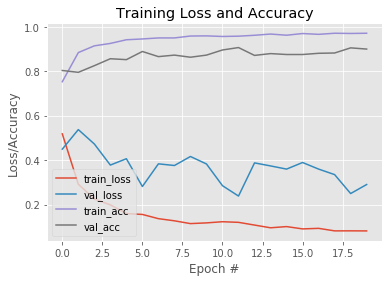

In [19]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")